In [144]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats

df = pd.read_csv('data.csv')

In [145]:
df.head()

,Temp_max,Temp_avg,Temp_min,WindSp(mph)_avg,Precip(in),Ridership,Subway_Bus,Date,Day_of_week,Weekend,Season,Winter,Spring,Summer,Holiday,Weekend_avg_temp,Weekend_precip,Holiday_precip,Holiday_avg_temp
0,83.0,75.0,66,14.1,0.00,3019343,1,2021-09-23,3,0,4,0,0,0,0,0.0,0.0,0.0,0.0
1,80.0,74.9,72,11.7,0.01,3026655,1,2021-09-22,2,0,4,0,0,0,0,0.0,0.0,0.0,0.0
2,76.0,71.0,64,8.4,0.00,3024458,1,2021-09-21,1,0,4,0,0,0,0,0.0,0.0,0.0,0.0
3,75.0,69.9,65,6.9,0.00,2889141,1,2021-09-20,0,0,4,0,0,0,0,0.0,0.0,0.0,0.0
4,77.0,72.3,67,7.8,0.00,1598414,1,2021-09-19,6,1,4,0,0,0,0,72.3,0.0,0.0,0.0


## Train-test split

In [146]:
X_train, X_test, y_train, y_test = train_test_split(df[['Temp_max','Temp_avg','Temp_min','WindSp(mph)_avg', 'Precip(in)', 'Subway_Bus', 'Day_of_week', 'Weekend', 'Winter', 'Spring', 'Summer', 'Holiday', 'Weekend_avg_temp', 'Weekend_precip', 'Holiday_precip', 'Holiday_avg_temp']], df['Ridership'], test_size=0.33, random_state=42)
# X_train1 = X_train['Temp_max','Temp_avg','Temp_min','WindSp(mph)_avg', 'Precip(in)', 'Subway_Bus', 'Weekend', 'Winter', 'Spring', 'Summer', 'Holiday', 'Weekend_avg_temp', 'Weekend_precip', 'Holiday_precip', 'Holiday_avg_temp']
X_train1 = X_train.drop(['Day_of_week'], axis=1)
X_test1 = X_test.drop(['Day_of_week'], axis=1)
m = LinearRegression()
m.fit(X_train1,y_train)
m.score(X_train1,y_train)
m.score(X_test1,y_test)

0.3358613072148161

In [147]:
X_train.shape
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 766 entries, 513 to 1126
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temp_max          766 non-null    float64
 1   Temp_avg          766 non-null    float64
 2   Temp_min          766 non-null    int64  
 3   WindSp(mph)_avg   766 non-null    float64
 4   Precip(in)        766 non-null    float64
 5   Subway_Bus        766 non-null    int64  
 6   Day_of_week       766 non-null    int64  
 7   Weekend           766 non-null    int64  
 8   Winter            766 non-null    int64  
 9   Spring            766 non-null    int64  
 10  Summer            766 non-null    int64  
 11  Holiday           766 non-null    int64  
 12  Weekend_avg_temp  766 non-null    float64
 13  Weekend_precip    766 non-null    float64
 14  Holiday_precip    766 non-null    float64
 15  Holiday_avg_temp  766 non-null    float64
dtypes: float64(8), int64(8)
memory usage: 101

In [148]:
X_test.shape

(378, 16)

In [149]:
type(y_train)

pandas.core.series.Series

In [150]:
type(y_test)

pandas.core.series.Series

## Model with all features (except Day_of_week)

In [151]:
X1 = sm.add_constant(X_train1)
est = sm.OLS(y_train, X1)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              Ridership   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     29.11
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           8.99e-65
Time:                        21:44:51   Log-Likelihood:                -11158.
No. Observations:                 766   AIC:                         2.235e+04
Df Residuals:                     750   BIC:                         2.242e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             8.876e+05   1.89e+05  

/home/ipsita/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<AxesSubplot:>

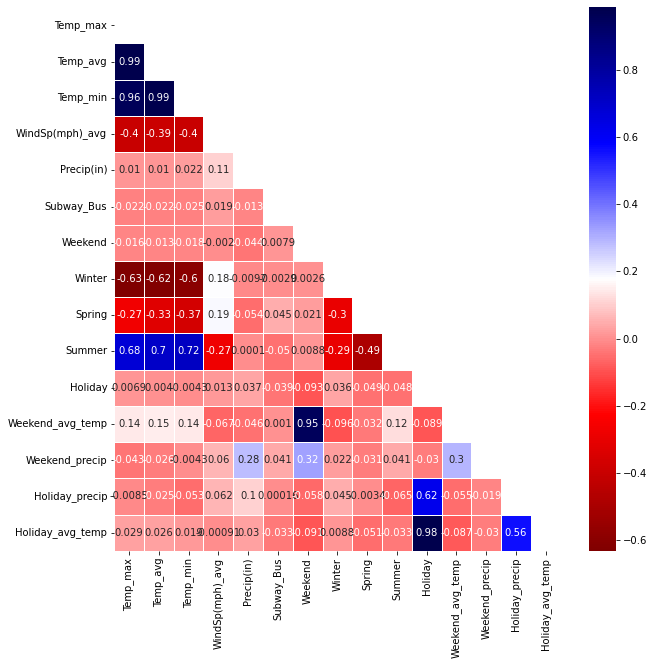

In [152]:
#X_tr = X_train(['Weekend', 'Winter', 'Spring', 'Summer', 'Holiday', 'Weekend_avg_temp', 'Weekend_precip', 'Holiday_precip', 'Holiday_avg_temp'], axis=1)
#sns.heatmap(X_train.corr(), cmap="seismic_r", annot=True, vmin=-2, vmax=2);

upper = np.triu(X_train1.corr()) 
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(X_train1.corr(), cmap="seismic_r", annot=True, linewidths=.5, mask=upper) #ax=ax, )

### Scaling (Not here any more)

In [153]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [154]:
std = StandardScaler()
std.fit(X_train.values)

StandardScaler()

In [155]:
X_tr = std.transform(X_train.values)

In [156]:
X_te = std.transform(X_test.values)

In [157]:
type(X_train), type(X_tr), type(y_train)

(pandas.core.frame.DataFrame, numpy.ndarray, pandas.core.series.Series)

## Same model with standardized coefficients.

In [158]:
X_tr1 = pd.DataFrame(X_tr, columns = ['Temp_max','Temp_avg','Temp_min','WindSp(mph)_avg', 'Precip(in)', 'Subway_Bus', 'Day_of_week', 'Weekend', 'Winter', 'Spring', 'Summer', 'Holiday', 'Weekend_avg_temp', 'Weekend_precip', 'Holiday_precip', 'Holiday_avg_temp'])
#y_tr = pd.DataFrame(y_train, columns=['Ridership'])
y_train = list(y_train)
#X_tr1.info()
X_tr2 = X_tr1.drop(['Day_of_week'], axis=1)
X2 = sm.add_constant(X_tr2)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     29.11
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           8.99e-65
Time:                        21:45:10   Log-Likelihood:                -11158.
No. Observations:                 766   AIC:                         2.235e+04
Df Residuals:                     750   BIC:                         2.242e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.215e+06   1.87e+04  

/home/ipsita/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Removed correlated features

In [16]:
#X_tr.drop(['x1', 'x3', 'x12', 'x15'], axis=1)

X_tr3 = pd.DataFrame(X_tr2, columns = ['Temp_avg','WindSp(mph)_avg', 'Precip(in)', 'Subway_Bus', 'Weekend', 'Winter', 'Spring', 'Summer', 'Holiday', 'Weekend_precip', 'Holiday_precip'])

X_tr3.head()
#print(type(df))
# X_train, X_test, y_train, y_test = train_test_split(df[['Temp_max','Temp_avg','Temp_min','WindSp(mph)_avg', 'Precip(in)', 'Subway_Bus', 'Weekend', 'Winter', 'Spring', 'Summer', 'Holiday', 'Weekend_avg_temp', 'Weekend_precip', 'Holiday_precip', 'Holiday_avg_temp']], df['Ridership'], test_size=0.33, random_state=42)

# m = LinearRegression()
# m.fit(X_train,y_train)
# m.score(X_train,y_train)
# m.score(X_test,y_test)

,Temp_avg,WindSp(mph)_avg,Precip(in),Subway_Bus,Weekend,Winter,Spring,Summer,Holiday,Weekend_precip,Holiday_precip
0,-0.533012,-0.322493,-0.313500,1.037247,-0.616588,-0.420299,1.423962,-0.693992,-0.150655,-0.199923,-0.093698
1,-1.472812,0.864262,-0.313500,1.037247,-0.616588,2.379258,-0.702266,-0.693992,-0.150655,-0.199923,-0.093698
2,-1.108021,-0.190631,-0.313500,1.037247,-0.616588,-0.420299,1.423962,-0.693992,-0.150655,-0.199923,-0.093698
3,1.099272,-0.612589,-0.203192,-0.964091,-0.616588,-0.420299,-0.702266,1.440939,-0.150655,-0.199923,-0.093698
4,-0.829791,-0.190631,0.568966,-0.964091,-0.616588,-0.420299,1.423962,-0.693992,-0.150655,-0.199923,-0.093698


In [17]:
# X_tr3 = X_tr1.drop(['Temp_max', 'Temp_min', 'Weekend_avg_temp', 'Holiday_avg_temp'], axis=1)
# type(X_tr2)
type(y_train)

list

## K-Fold Validation

In [94]:
import sklearn.model_selection
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, X_tr3, y_train, cv=kf, scoring='r2').mean()

0.33245446963049186

In [19]:
X3 = sm.add_constant(X_tr3)
y_train = list(y_train)
est = sm.OLS(y_train, X3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     39.50
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           2.65e-67
Time:                        16:43:47   Log-Likelihood:                -11160.
No. Observations:                 766   AIC:                         2.234e+04
Df Residuals:                     754   BIC:                         2.240e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.215e+06   1.87e+04     

/home/ipsita/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Still some coefficient signs that are off: Spring, Summer, and Weekend precipitation although with low p-value. Removing the next correlated variable, 'Winter'.

In [20]:
X_tr4 = X_tr3.drop(['Winter'], axis=1)
X_tr4.head()

,Temp_avg,WindSp(mph)_avg,Precip(in),Subway_Bus,Weekend,Spring,Summer,Holiday,Weekend_precip,Holiday_precip
0,-0.533012,-0.322493,-0.313500,1.037247,-0.616588,1.423962,-0.693992,-0.150655,-0.199923,-0.093698
1,-1.472812,0.864262,-0.313500,1.037247,-0.616588,-0.702266,-0.693992,-0.150655,-0.199923,-0.093698
2,-1.108021,-0.190631,-0.313500,1.037247,-0.616588,1.423962,-0.693992,-0.150655,-0.199923,-0.093698
3,1.099272,-0.612589,-0.203192,-0.964091,-0.616588,-0.702266,1.440939,-0.150655,-0.199923,-0.093698
4,-0.829791,-0.190631,0.568966,-0.964091,-0.616588,1.423962,-0.693992,-0.150655,-0.199923,-0.093698


In [21]:
lm = LinearRegression()
kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, X_tr4, y_train, cv=kf, scoring='r2')

array([0.32002749, 0.40705024, 0.34910336, 0.2858433 , 0.29954471])

In [22]:
X4 = sm.add_constant(X_tr4)
#y_train = list(y_train)
est = sm.OLS(y_train, X4)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     43.35
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           6.39e-68
Time:                        16:43:49   Log-Likelihood:                -11160.
No. Observations:                 766   AIC:                         2.234e+04
Df Residuals:                     755   BIC:                         2.239e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.215e+06   1.87e+04     

/home/ipsita/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## Weekday dummies

## Back to original (not scaled) data

In [64]:
#new_df = pd.get_dummies(new_data)
X_tr5 = X_train.reindex(columns = ['Temp_avg','WindSp(mph)_avg','Precip(in)','Subway_Bus', 'Day_of_week', 'Summer','Holiday','Holiday_precip'])
#X_tr5.info()
#X_tr5.describe()
type(X_tr5)
#X_tr3 = X_tr1.drop(['Temp_max', 'Temp_min', 'Weekend_avg_temp', 'Holiday_avg_temp'], axis=1)

pandas.core.frame.DataFrame

In [48]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_trn, X_val, y_trn, y_val = \
        train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_trn, y_trn)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [57]:
X_tr5['Day_of_week'].value_counts()

3    122
2    113
0    111
6    111
4    107
1    102
5    100
Name: Day_of_week, dtype: int64

In [50]:
pd.get_dummies(X_tr5['Day_of_week']).head()

,0,1,2,3,4,5,6
513,0,1,0,0,0,0,0
259,0,0,0,1,0,0,0
204,0,0,1,0,0,0,0
1040,0,0,0,0,1,0,0
736,1,0,0,0,0,0,0


In [60]:
# X5 = X_tr5.copy()
# X5['Day_of_week'] = X_tr5['Day_of_week']
# split_and_validate(X5['Day_of_week'].get_dummies(drop_first=True), y_train)

AttributeError: 'Series' object has no attribute 'get_dummies'

In [63]:
# X5 = pd.get_dummies(X_tr5, drop_first=True)
# new_df = pd.concat([X_tr5, X5], axis=1)
# split_and_validate(new_df['Day_of_week'], y_train)


Validation R^2 score was: 0.08447603808493176
Feature coefficient results: 

Day_of_week : -44537.83
Day_of_week : -44537.83


In [90]:
X = pd.get_dummies(X_tr5['Day_of_week'], drop_first = True)
X5 = pd.concat([X_tr5, X], axis=1)
X6 = X5.drop(['Day_of_week'], axis=1)
#X5['Weekend'] = X5['5'] + X5['6']
#X5.head()
split_and_validate(X6,y_train)


Validation R^2 score was: 0.4612703053074677
Feature coefficient results: 

Temp_avg : 5826.29
WindSp(mph)_avg : -1244.13
Precip(in) : -30976.79
Subway_Bus : 571761.71
Summer : -60208.92
Holiday : -307078.09
Holiday_precip : -561624.82
1 : 49372.34
2 : 44227.09
3 : 7931.93
4 : 61070.16
5 : -366867.36
6 : -604159.19


In [91]:
lm = LinearRegression()
kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, X6, y_train, cv=kf, scoring='r2').mean()

0.32949352788351305

OOPS! Seriously different validation scores for k-fold and split_and_validate!

In [92]:
X5_dummy = sm.add_constant(X6)
#y_train = list(y_train)
est = sm.OLS(y_train, X5_dummy)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     34.36
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           1.75e-67
Time:                        19:09:29   Log-Likelihood:                -11156.
No. Observations:                 766   AIC:                         2.234e+04
Df Residuals:                     752   BIC:                         2.240e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            7.147e+05   1.35e+05     

/home/ipsita/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Many terms with high p-value. The model without the dummies was better. Reverting to that. Also the split and validate option got a validation sample for which the score was 0.46, compared to the training score of 0.37 and a K-fold mean of 0.32 indicating overfitting for some sample. Let's continue with the earlier models with weekend only and no weekday dummies eliminating more features based on p-values of the feature coefficients. 

# Final Linear REgression Model

In [165]:
X_tr6 = X_tr2.drop(['Temp_max', 'Temp_min', 'Holiday', 'Weekend_avg_temp', 'Weekend_precip', 'Holiday_avg_temp', 'WindSp(mph)_avg', 'Precip(in)', 'Winter'], axis=1)
X_tr6.head()

,Temp_avg,Subway_Bus,Weekend,Spring,Summer,Holiday_precip
0,-0.533012,1.037247,-0.616588,1.423962,-0.693992,-0.093698
1,-1.472812,1.037247,-0.616588,-0.702266,-0.693992,-0.093698
2,-1.108021,1.037247,-0.616588,1.423962,-0.693992,-0.093698
3,1.099272,-0.964091,-0.616588,-0.702266,1.440939,-0.093698
4,-0.829791,-0.964091,-0.616588,1.423962,-0.693992,-0.093698


In [166]:
lm = LinearRegression()
kf = sklearn.model_selection.KFold(n_splits=5, shuffle=True, random_state = 71)
cross_val_score(lm, X_tr6, y_train, cv=kf, scoring='r2')

array([0.31827496, 0.41279582, 0.34681901, 0.28778259, 0.29689296])

In [169]:
lm.fit(X_tr6,y_train)
#m.score(X_train1,y_train)
m.score(X_test1,y_test)

0.3358613072148161

In [170]:
X6 = sm.add_constant(X_tr6)
#y_train = list(y_train)
est = sm.OLS(y_train, X6)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     71.42
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           1.61e-70
Time:                        21:52:37   Log-Likelihood:                -11163.
No. Observations:                 766   AIC:                         2.234e+04
Df Residuals:                     759   BIC:                         2.237e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.215e+06   1.87e+04     64.

/home/ipsita/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


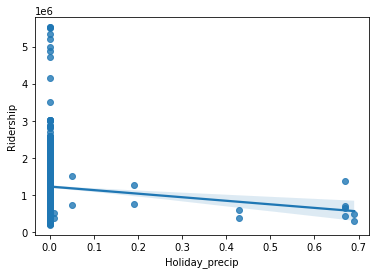

In [200]:
Final_X = pd.concat([X_tr6, y_train], axis=1)
ridership = pd.read_csv("data.csv")
#x, y = pd.Series(x, name="x_var"), pd.Series(y, name="y_var")
ax = sns.regplot(x='Holiday_precip', y='Ridership', data = ridership)
plt.savefig('pred_holiday_precip.png')

In [191]:
preds = lm.predict(X_tr6) # generate predictions (on training data) using fit model
def MAE(actuals, preds): #mean absolute error
    return np.mean(np.abs(actuals-preds))

MAE(y_train,preds)

330691.5068733119

In [197]:
d = {'Features': ['Temp_avg', 'Subway', 'Weekend', 'Spring', 'Summer', 'Holiday_precip'], 'Coefficients' : [106500, 291100, -235300, -41080,-53410, -64980]}
d1 = pd.DataFrame(data=d)
d1

,Features,Coefficients
0,Temp_avg,106500
1,Subway,291100
2,Weekend,-235300
3,Spring,-41080
4,Summer,-53410
5,Holiday_precip,-64980


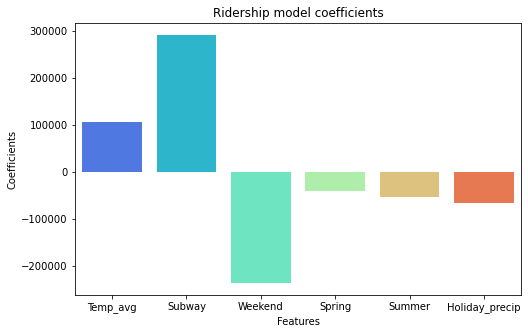

In [199]:
plt.figure(figsize=(8,5))
sns.barplot(x='Features',y='Coefficients',data=d1, palette='rainbow')
plt.title("Ridership model coefficients")
plt.savefig('coefficient_barplot.png')

# A Lasso model estimated when the split and validate function indicated overfitting

In [171]:
alphavec = 10**np.linspace(-2,2,200)

lasso_model = LassoCV(alphas = alphavec, cv=5)
lasso_model.fit(X_tr3, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [172]:
lasso_model.alpha_

100.0

In [173]:
list(zip(X_train.columns, lasso_model.coef_))

[('Temp_max', 77585.54577168923),
 ('Temp_avg', -13899.204158603538),
 ('Temp_min', -16953.26894059283),
 ('WindSp(mph)_avg', 288996.47409296804),
 ('Precip(in)', -240893.69681089063),
 ('Subway_Bus', -32420.54860072037),
 ('Day_of_week', -61702.15612012521),
 ('Weekend', -56760.87286369592),
 ('Winter', -46222.03800263356),
 ('Spring', 8222.30602369463),
 ('Summer', -33241.23474933879)]

In [174]:
#test_set_pred = lasso_model.predict(X_test)
#This did not work as possibly the lasso model reduced the number 
#of coefficients to 10

## Lars Path for indication of which features to retain

In [175]:
from sklearn.linear_model import lars_path
Xtr = X_train1.values
ytr = np.array(y_train)

In [176]:
print("Computing regularization path using the LARS ...")
alphas, _, coefs = linear_model.lars_path(Xtr, ytr, method='lasso', verbose = True)

Computing regularization path using the LARS ...
.

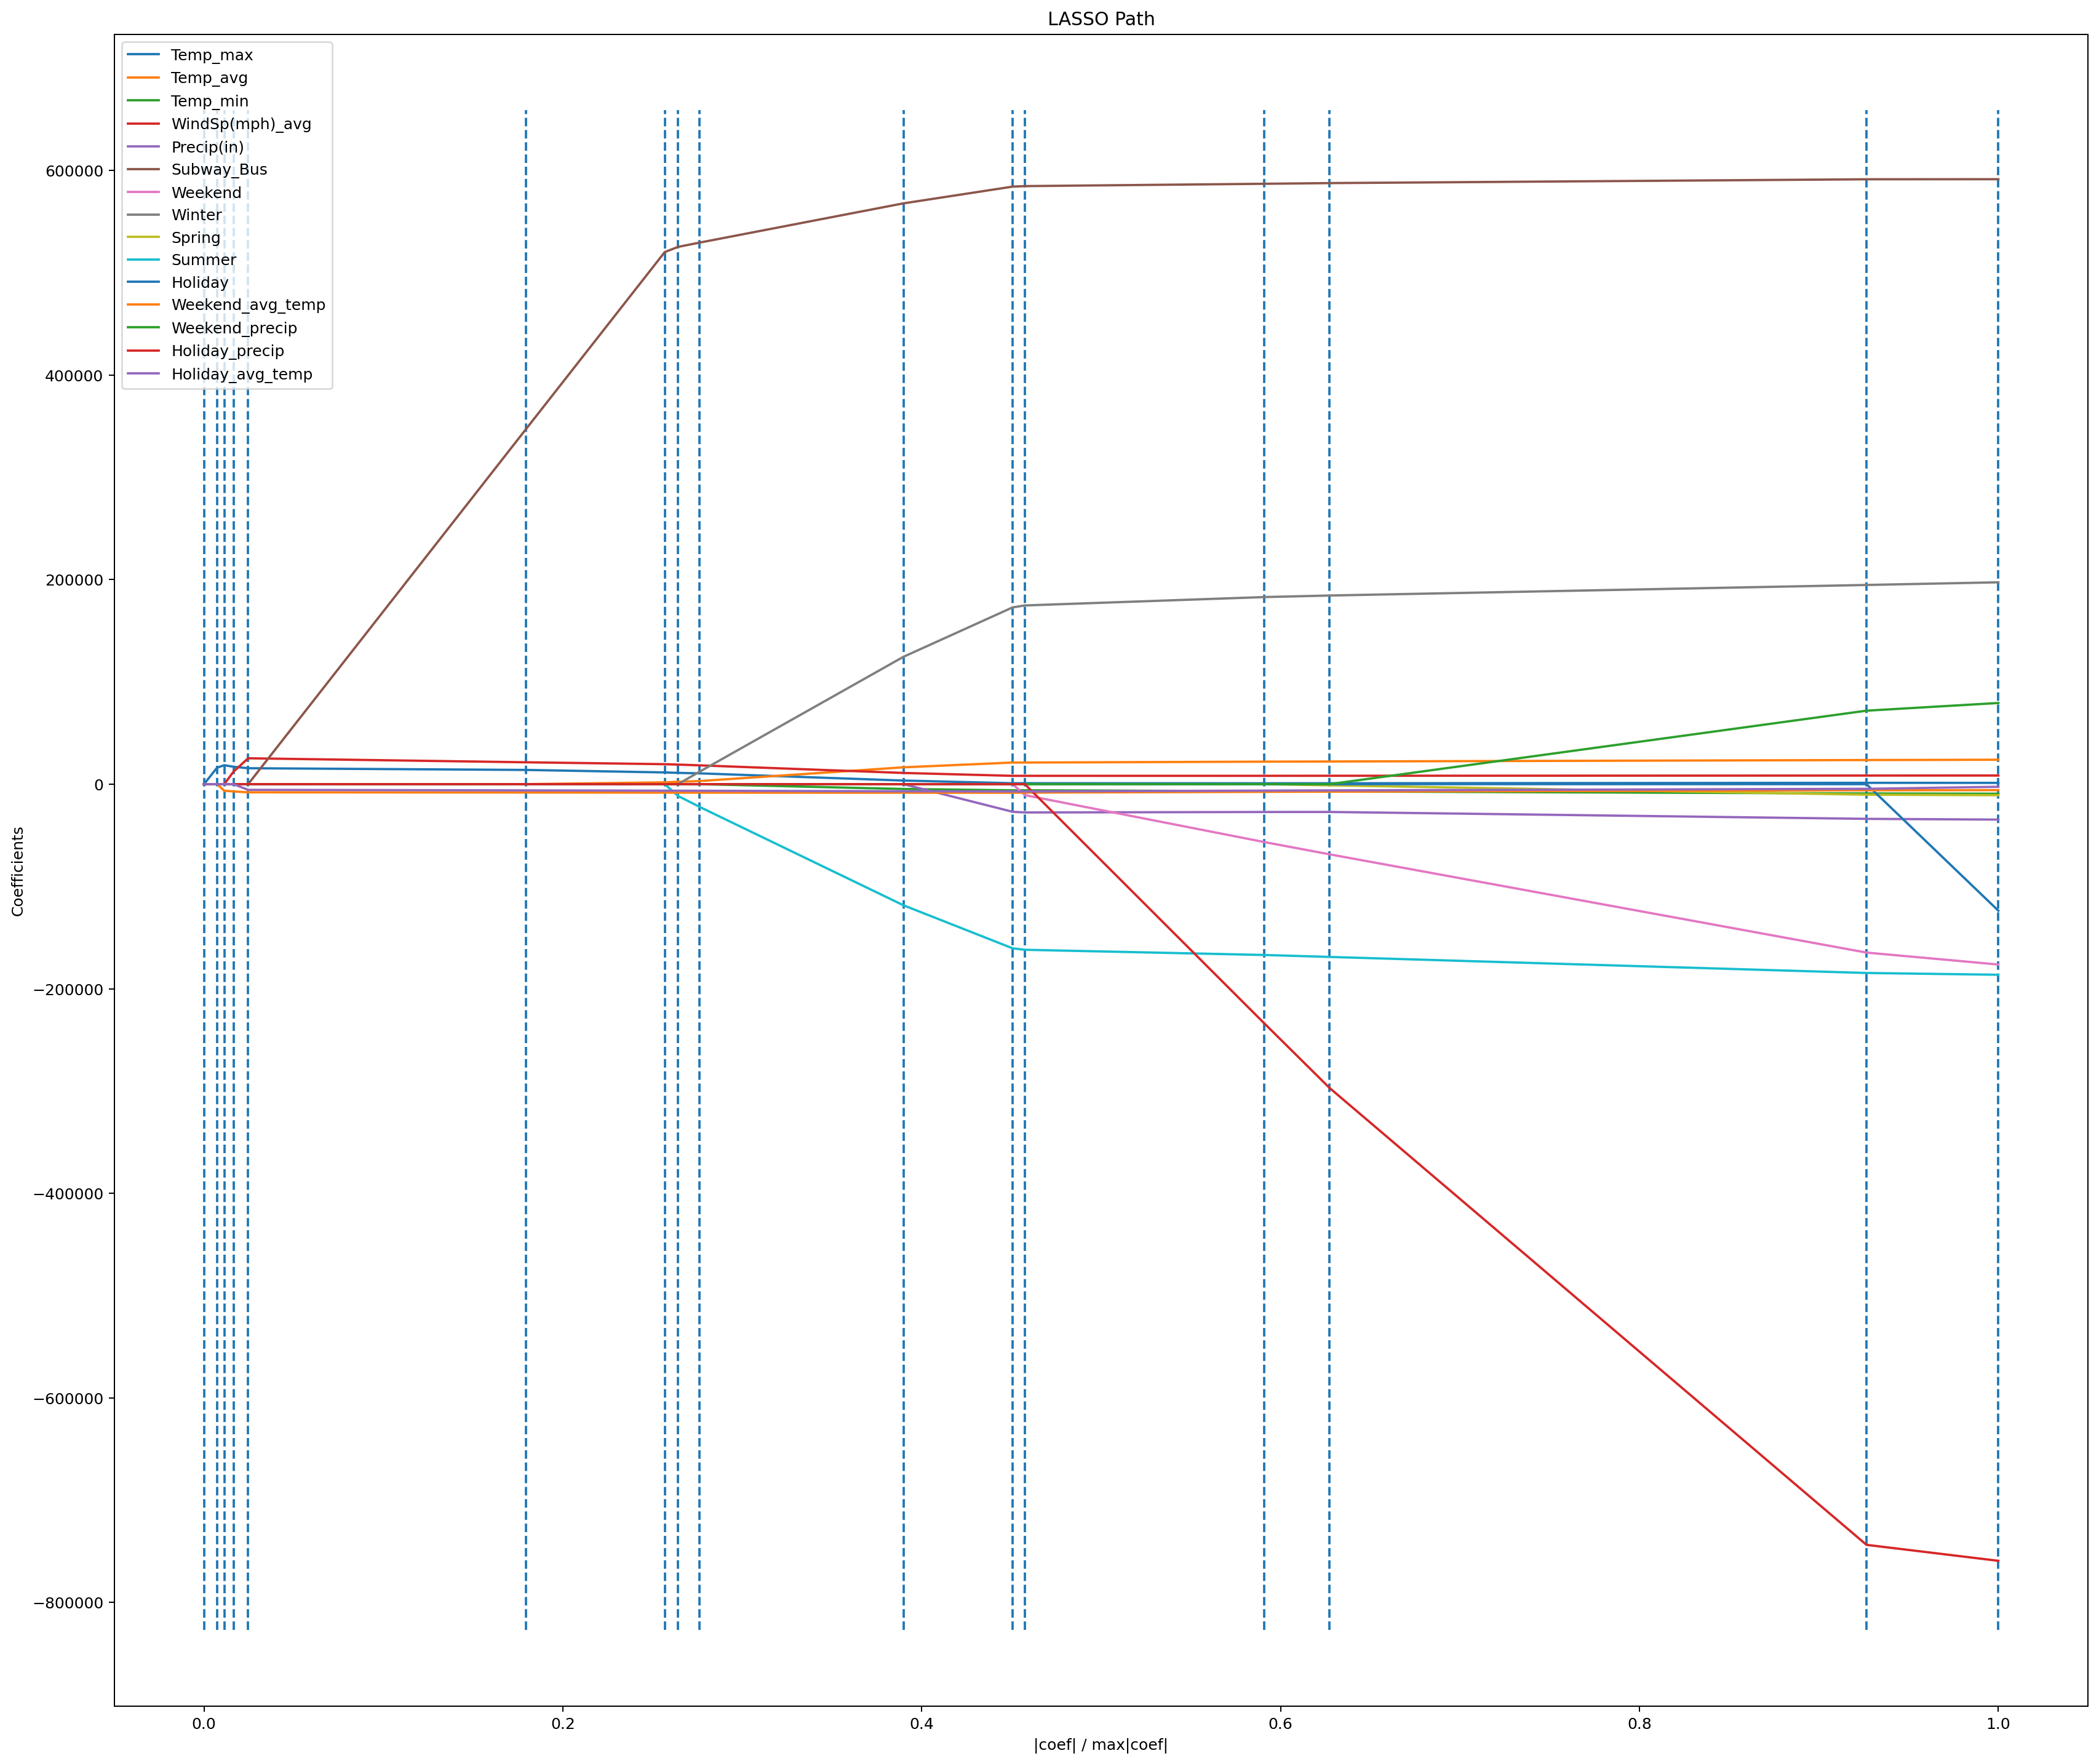

<Figure size 432x288 with 0 Axes>

In [201]:
# plotting the LARS path


xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.figure(figsize=(23,20), dpi=180)
plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
plt.legend(X_train1.columns)
plt.show()
plt.savefig('coefficient_larsplot.png')

## Appendix: Very first attempt!

In [178]:
#sns.heatmap(df.corr(), annot=True)
# X_train, X_test, y_train, y_test = train_test_split(df[['Temp_max','Temp_avg','Temp_min','WindSp(mph)_avg', 'Precip(in)', 'Subway_Bus', 'Weekend', 'Winter', 'Spring', 'Summer', 'Holiday']], df['Ridership'], test_size=0.33, random_state=42)

# m = LinearRegression()
# m.fit(X_train,y_train)
# m.score(X_train,y_train)
# m.score(X_test,y_test)

In [179]:
# X2 = sm.add_constant(X_train)
# est = sm.OLS(y_train, X2)
# est2 = est.fit()
# print(est2.summary())

In [180]:
X_train, X_test, y_train, y_test = train_test_split(df[['Weekend','Winter','Spring','Summer', 'Holiday', 'Weekend_avg_temp', 'Weekend_precip', 'Holiday_precip', 'Holiday_avg_temp']], df['Ridership'], test_size=0.33, random_state=42)

m = LinearRegression()
m.fit(X_train,y_train)
m.score(X_train,y_train)
m.score(X_test,y_test)

0.17336938878145547

In [181]:
#Didn't the correlation heatmap tell me already that Temp_max, Temp_min, and Temp_avg are correlated? I still used all three in my baseline regression model!

In [182]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:              Ridership   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     15.95
Date:                Thu, 30 Sep 2021   Prob (F-statistic):           4.55e-24
Time:                        22:02:47   Log-Likelihood:                -11268.
No. Observations:                 766   AIC:                         2.256e+04
Df Residuals:                     756   BIC:                         2.260e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.494e+06   5.09e+04  

/home/ipsita/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


I actually did this one earlier. This also seems to have multicollinearity. Check with a correlation heatmap.